In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import astropy.cosmology as apc
import subprocess

%matplotlib inline

In [2]:
BGS_data = Table.read('/global/project/projectdirs/desi/users/shadaba/Buzzard/FiberAssign/FA_LSS/buzzard_FullFAnew_BGS.fits')

In [3]:
BGS_data[:5]

RA,DEC,Z_COSMO,DZ_RSD,id,Z,PASS,epoch,year,TARGETID
float64,float64,float32,float32,int64,float32,int64,int64,int64,int64
44.3956487453,4.99122348769,0.339316,0.000291198,0,-1.0,-1,-1,-1,-1
45.897144708,1.87513013936,0.336526,-0.00118455,1,0.335342,5,0,1,288230376151711744
42.6558712955,5.38564605601,0.340032,-0.000127256,2,0.339905,7,4,3,288230376151711744
45.0491382746,4.04734531688,0.333508,0.000130296,3,-1.0,-1,-1,-1,-1
46.3167583294,6.03060448002,0.330785,-7.53403e-05,4,-1.0,-1,-1,-1,-1


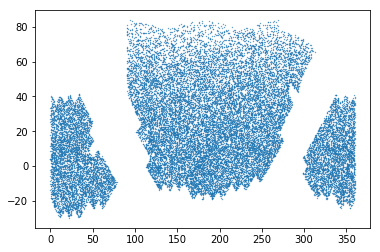

In [4]:
n = len(BGS_data)
r = np.random.random(n)
ii = r<0.001
plt.scatter(BGS_data['RA'][ii], BGS_data['DEC'][ii], s=0.1)

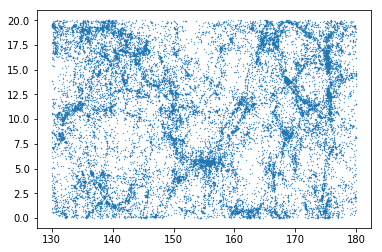

In [5]:
kk = (BGS_data['RA']>130) & (BGS_data['RA']<180) & (BGS_data['DEC']>0.0) & (BGS_data['DEC']<20.0)
zz = (BGS_data['Z']>0.1) & (BGS_data['Z']<0.11)
plt.scatter(BGS_data['RA'][kk & zz], BGS_data['DEC'][kk & zz], s=0.1)

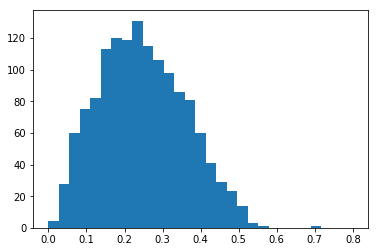

In [7]:
_ = plt.hist(BGS_data['Z_COSMO'][kk & ii], bins=np.linspace(0.0, 0.80, 30))

In [8]:
BGS_cut = BGS_data[kk]

In [9]:
len(BGS_cut)

1389170

In [10]:
planck15 = apc.Planck15
#BGS_cut['R_COMOV'] = planck15.comoving_distance(BGS_cut['Z_COSMO']+BGS_cut['DZ_RSD'])
BGS_cut['R_COMOV'] = planck15.comoving_distance(BGS_cut['Z_COSMO'])

In [11]:
BGS_cut['theta'] = np.deg2rad(90-BGS_cut['DEC'])
BGS_cut['phi'] = np.deg2rad((360-BGS_cut['RA'] - (90+60))%360.0)
BGS_cut['z_coord'] = BGS_cut['R_COMOV'] * np.cos(BGS_cut['theta'])
BGS_cut['y_coord'] = BGS_cut['R_COMOV'] * np.sin(BGS_cut['theta']) * np.sin(BGS_cut['phi'])
BGS_cut['x_coord'] = BGS_cut['R_COMOV'] * np.sin(BGS_cut['theta']) * np.cos(BGS_cut['phi'])
BGS_cut['RAND'] = np.random.random(len(BGS_cut))

(-93.374987510133622,
 3354.7056829072785,
 -144.15961398618728,
 3303.9210564312248)

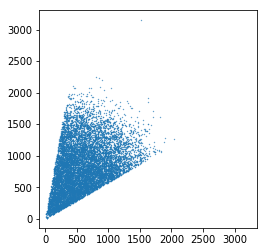

In [12]:
rr = BGS_cut['RAND']<0.01
plt.scatter(BGS_cut['x_coord'][rr], BGS_cut['y_coord'][rr], s=0.1)
plt.axis('square')

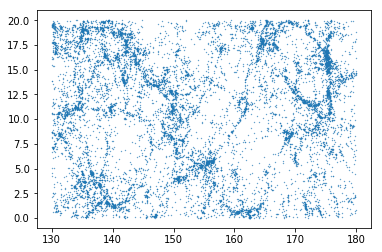

In [13]:
qq = (BGS_cut['Z']>0.1) & (BGS_cut['Z']<0.105)
plt.scatter(BGS_cut['RA'][qq], BGS_cut['DEC'][qq], s=0.1)

In [14]:
BGS_cut[:5]

RA,DEC,Z_COSMO,DZ_RSD,id,Z,PASS,epoch,year,TARGETID,R_COMOV,theta,phi,z_coord,y_coord,x_coord,RAND
,,,,,,,,,,Mpc,,,Mpc,Mpc,Mpc,
float64,float64,float32,float32,int64,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
136.348526798,7.49313947849,0.337103,-0.0011611,44678508,0.335942,7,6,4,288230376420147200,1370.63689141,1.44001637158,1.28546070631,178.74129886,1303.98692577,382.511612361,0.387015013535
138.251671552,3.82630877191,0.335308,-0.00196138,44678517,0.333347,5,1,1,288230376420147200,1363.98947879,1.50401464053,1.25224456422,91.0218258001,1292.47969211,426.237693039,0.919378827843
131.367998489,3.73154308037,0.339591,-0.00163293,44678523,0.337958,5,1,1,288230376420147200,1379.83695116,1.50566861386,1.3723873238,89.8021090305,1349.89856289,271.40276876,0.514460523467
132.197077926,3.69431912291,0.341908,-0.00223082,44678532,0.339678,5,1,1,288230376420147200,1388.39787988,1.50631829448,1.35791715787,89.4591467944,1354.23716837,292.724146124,0.397667865249
135.350871039,1.21042416588,0.340685,-0.00129306,44678541,-1.0,-1,-1,-1,-1,1383.8789465,1.54967043975,1.30287308412,29.233495688,1334.20817103,366.271617324,0.681336389951


In [15]:
set(BGS_cut['PASS'])
nn = BGS_cut['R_COMOV'] < 1000

In [16]:
np.savetxt('BGS_truth.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn])

In [17]:
aa = BGS_cut['PASS']>0
bb = BGS_cut['PASS']==5
cc = BGS_cut['PASS']==6
dd = BGS_cut['PASS']==7

In [18]:
np.savetxt('BGS_pass_1.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn & bb])

In [19]:
np.savetxt('BGS_pass_1_2.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn & (bb|cc)])

In [20]:
np.savetxt('BGS_pass_1_2_3.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn & (bb|cc|dd)])

In [22]:
input_files = ["BGS_pass_1.txt", "BGS_pass_1_2.txt", "BGS_pass_1_2_3.txt", "BGS_truth.txt"]
beta_values = [1.0, 2.0]
for input_file in input_files:
    for beta_value in beta_values:
        output_file = input_file.replace(".txt", "_beta_{:.2f}".format(beta_value))
        cmd = "./LSS_BSK_calc -beta {} -printinfo True -numNNB 300 ".format(beta_value)
        cmd += "-input {} -output {}".format(input_file, output_file) 
        print(cmd)
        #err = subprocess.call(cmd.split())
        assert err == 0

./LSS_BSK_calc -beta 1.0 -printinfo True -numNNB 300 -input BGS_pass_1.txt -output BGS_pass_1_beta_1.00
./LSS_BSK_calc -beta 2.0 -printinfo True -numNNB 300 -input BGS_pass_1.txt -output BGS_pass_1_beta_2.00
./LSS_BSK_calc -beta 1.0 -printinfo True -numNNB 300 -input BGS_pass_1_2.txt -output BGS_pass_1_2_beta_1.00
./LSS_BSK_calc -beta 2.0 -printinfo True -numNNB 300 -input BGS_pass_1_2.txt -output BGS_pass_1_2_beta_2.00
./LSS_BSK_calc -beta 1.0 -printinfo True -numNNB 300 -input BGS_pass_1_2_3.txt -output BGS_pass_1_2_3_beta_1.00
./LSS_BSK_calc -beta 2.0 -printinfo True -numNNB 300 -input BGS_pass_1_2_3.txt -output BGS_pass_1_2_3_beta_2.00
./LSS_BSK_calc -beta 1.0 -printinfo True -numNNB 300 -input BGS_truth.txt -output BGS_truth_beta_1.00
./LSS_BSK_calc -beta 2.0 -printinfo True -numNNB 300 -input BGS_truth.txt -output BGS_truth_beta_2.00


In [23]:
!ls

BGS_pass_1.txt	    BGS_truth.txt	   README.md
BGS_pass_1_2.txt    Buzzard_example.ipynb  explore_mocks.ipynb
BGS_pass_1_2_3.txt  LSS_BSK_calc	   xdl_beta_skeleton


In [24]:
pairs = {}
pairs['pass_1_beta_2']= np.int_(np.loadtxt('xdl_beta_skeleton/BGS_pass_1_beta_2.00.BSKIndex'))
pairs['pass_1_2_3_beta_2']= np.int_(np.loadtxt('xdl_beta_skeleton/BGS_pass_1_2_3_beta_2.00.BSKIndex'))
pairs['truth_beta_2'] = np.int_(np.loadtxt('xdl_beta_skeleton/BGS_truth_beta_2.00.BSKIndex'))
position = {}
position['pass_1']= np.loadtxt('BGS_pass_1.txt')
position['pass_1_2_3']= np.loadtxt('BGS_pass_1_2_3.txt')
position['truth'] = np.loadtxt('BGS_truth.txt')

In [25]:
def compute_stats(pairs, position):
    pos_halo_A = position[pairs[:,0]]
    pos_halo_B = position[pairs[:,1]]
    delta_pos = pos_halo_A - pos_halo_B
    norm_delta_pos = np.sqrt(np.sum(delta_pos**2, axis=1))
    norm_pos_halo_A = np.sqrt(np.sum(pos_halo_A**2, axis=1))
    mu = np.abs(np.sum(delta_pos*pos_halo_A, axis=1)/(norm_delta_pos*norm_pos_halo_A))
    return norm_delta_pos, mu

In [26]:
norms = {}
mu = {}

model = 'pass_1'
norms[model], mu[model] = compute_stats(pairs[model+'_beta_2'], position[model])
model = 'pass_1_2_3'
norms[model], mu[model] = compute_stats(pairs[model+'_beta_2'], position[model])
model = 'truth'
norms[model], mu[model] = compute_stats(pairs[model+'_beta_2'], position[model])

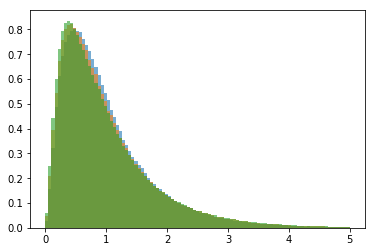

In [32]:
_ = plt.hist(norms['pass_1']/np.mean(norms['pass_1']),bins=np.linspace(0.0, 5.0, 100), alpha=0.6, density=True)
_ = plt.hist(norms['pass_1_2_3']/np.mean(norms['pass_1_2_3']),bins=np.linspace(0.0, 5.0, 100), alpha=0.6, density=True)
_ = plt.hist(norms['truth']/np.mean(norms['truth']),bins=np.linspace(0.0, 5.0,100), alpha=0.6, density=True)

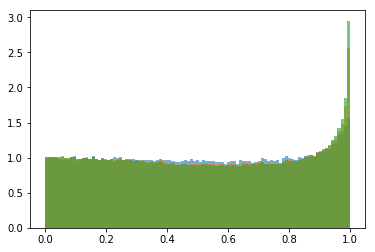

In [28]:
_ = plt.hist(mu['pass_1'],bins=np.linspace(0.0, 1.0, 100), alpha=0.6, density=True)
_ = plt.hist(mu['pass_1_2_3'],bins=np.linspace(0.0, 1.0, 100), alpha=0.6, density=True)
_ = plt.hist(mu['truth'],bins=np.linspace(0.0, 1.0,100), alpha=0.6, density=True)